In [11]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
from scipy.ndimage import convolve
import cv2

SMOOTHING

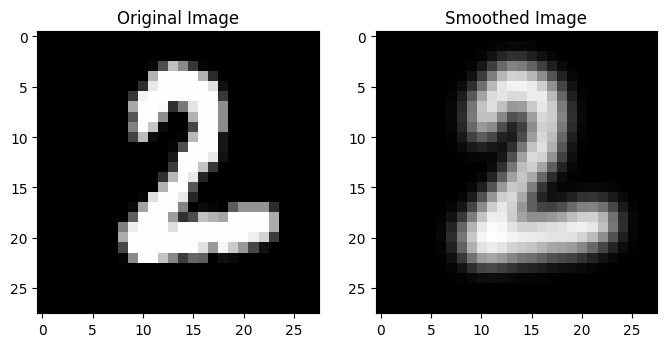

In [25]:
# Load MNIST dataset
(train_images, _), (_, _) = mnist.load_data()
 # Select a random digit image from the dataset
index = np.random.randint(0, train_images.shape[0])
digit_image = train_images[index]
 # Apply smoothing filter
smoothed_image = cv2.GaussianBlur(digit_image, (5, 5), 0)
 # Plot original and smoothed images
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(digit_image, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(smoothed_image, cmap='gray')
plt.title('Smoothed Image')
plt.show()

SHARPENING

Text(0.5, 1.0, 'Sharpened Image')

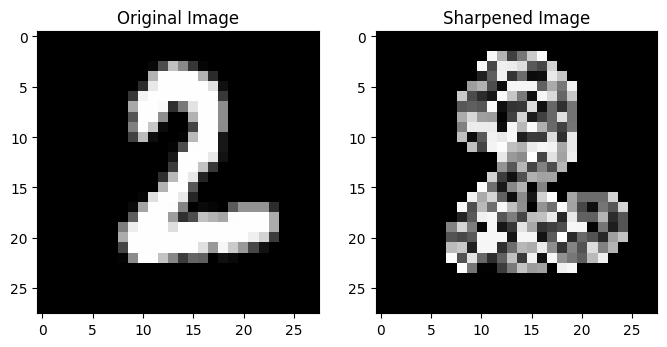

In [26]:
plt.figure(figsize=(8, 4))
 # Define a sharpening filter
sharpening_filter = np.array([[0, -1, 0],
                              [-1, 9, -1],
                              [0, -1, 0]])
plt.subplot(1, 2, 1)
plt.imshow(digit_image, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
sharpened_image = convolve(digit_image, sharpening_filter)
plt.imshow(sharpened_image, cmap='gray')
plt.title('Sharpened Image')

NOISE ADDITION

Text(0.5, 1.0, 'noisy image')

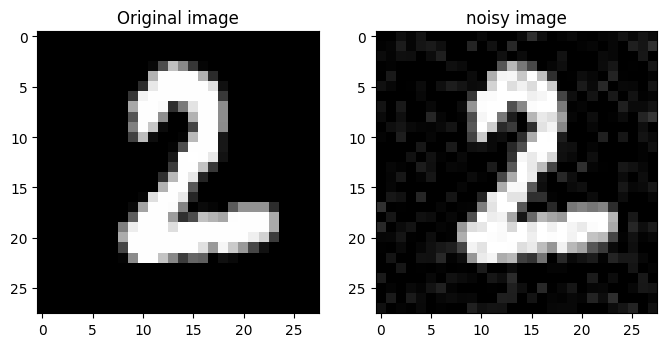

In [27]:
mean = 0
std_dev = 20  # Adjust the standard deviation for desired noise level
noise = np.random.normal(mean, std_dev, digit_image.shape)
noisy_image = cv2.add(digit_image.astype(np.float64), noise).clip(0, 255).astype(np.uint8)
plt.figure(figsize=(8, 4))
 # Display original and noisy images
plt.subplot(1, 2, 1)
plt.imshow(digit_image, cmap='gray')
plt.title('Original image')
plt.subplot(1, 2, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('noisy image')

IMAGE RESTORATION

<Figure size 800x400 with 0 Axes>

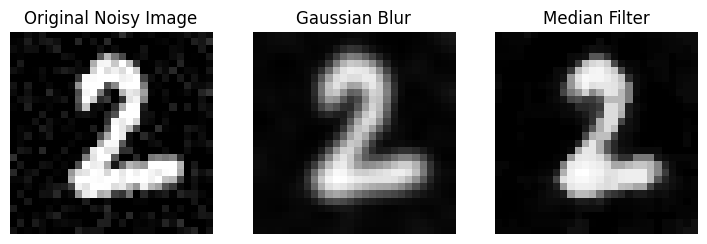

In [28]:
 # Gaussian smoothing (blurring)
gaussian_blur = cv2.GaussianBlur(noisy_image, (5, 5), 0)
 # Median filtering (useful for salt-and-pepper noise)
median_filtered = cv2.medianBlur(noisy_image, 5)
plt.figure(figsize=(8, 4))
 # Display the results
plt.figure(figsize=(12, 8))
plt.subplot(1, 4, 1)
plt.title("Original Noisy Image")
plt.imshow(noisy_image, cmap='gray')
plt.axis('off')
plt.subplot(1, 4, 2)
plt.title("Gaussian Blur")
plt.imshow(gaussian_blur, cmap='gray')
plt.axis('off')
plt.subplot(1, 4, 3)
plt.title("Median Filter")
plt.imshow(median_filtered, cmap='gray')
plt.axis('off')
plt.show()

IMAGE SEGMENTATION

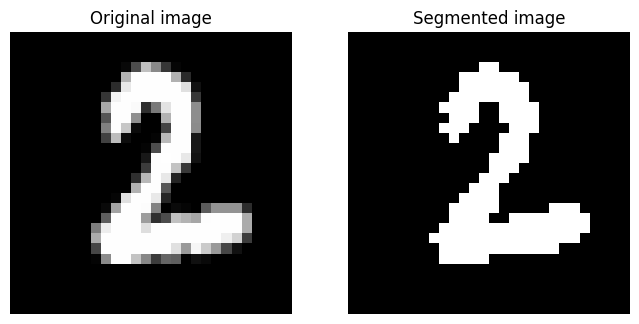

In [29]:
 # Apply thresholding segmentation
_, segmented_image = cv2.threshold(digit_image, 127, 255, cv2.THRESH_BINARY)
plt.figure(figsize=(8, 4))
 # Display the original image and segmented image
plt.subplot(1, 2, 1)
plt.title("Original image")
plt.imshow(digit_image, cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title("Segmented image")
plt.imshow(segmented_image, cmap='gray')
plt.axis('off')
plt.show()

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [31]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [32]:
# Define a simple model
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=128, validation_split=0)

Epoch 1/5
469/469 [==============================] - 3s 4ms/step - loss: 0.3614 - accuracy: 0.9001
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.1706 - accuracy: 0.9517
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.1222 - accuracy: 0.9653
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0953 - accuracy: 0.9728
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0769 - accuracy: 0.9776


1/1 [==============================] - 0s 29ms/step


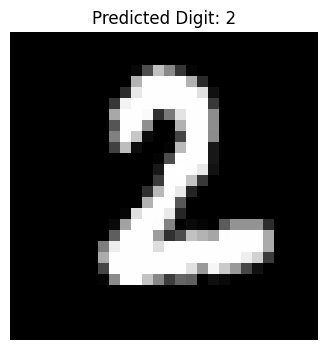

In [34]:
# Preprocess the image for prediction
input_image = digit_image.reshape(1, 28, 28, 1).astype('float32') / 255

prediction = model.predict(input_image)
predicted_digit = np.argmax(prediction)

# Display the digit image with the prediction
plt.figure(figsize=(4, 4))
plt.imshow(digit_image, cmap='gray')
plt.title(f'Predicted Digit: {predicted_digit}')
plt.axis('off')
plt.show()